In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm.notebook import tqdm
import seaborn as sns
import functools
import operator
import os
import swifter
import collections
train_file = "Train.csv"
test_file = "Test.csv"

In [2]:
df = pd.read_csv(train_file)
df.head()

,Uniq Id,Package Name,Package Type,Destination,Itinerary,Places Covered,Travel Date,Hotel Details,Start City,Airline,Flight Stops,Meals,Sightseeing Places Covered,Cancellation Rules,Per Person Price
0,e788ab76d9d8cf1e6ed2f139645ca5d1,Best of Shimla and Manali Holiday from Delhi,Standard,New Delhi|Shimla|Manali|Chandigarh,1N New Delhi . 2N Shimla . 2N Manali . 1N Chan...,New Delhi|Shimla|Manali|Chandigarh,30-07-2021,Not Available,Mumbai,Not Available,2,3,Not Available,Not Available,11509.0
1,178f892630ce3e335a5a41d5d83937fd,Kashmir Valley vacation,Premium,Srinagar|Pahalgam|Srinagar,1N Srinagar . 2N Pahalgam . 1N Srinagar,Srinagar|Pahalgam|Srinagar,08-12-2021,The Orchard Retreat & Spa:4.6|WelcomHotel Pine...,New Delhi,IndiGo|IndiGo,0,5,Dal Lake | Avantipura Ruins | Mughal Gardens ...,Cancellation any time after making the 1st pay...,22485.5
2,f060f2954840503cc2fdaf495357b7df,Might of Mewar- Udaipur and Chittorgarh,Luxury,Udaipur|Chittorgarh,2N Udaipur . 1N Chittorgarh,Udaipur|Chittorgarh,26-04-2021,The Ananta:4.4|juSTa Lake Nahargarh Palace:4,New Delhi,IndiGo,0,4,Lake Pichola | Jag Mandir Palace | Saheliyon ...,Cancellation any time after making the 1st pay...,12421.5
3,32a19a6c171e67448f2346da46c619dc,Colorful Kerala ( Romantic Getaway ),Premium,Munnar|Kumarakom|Allepey|Kovalam and Poovar,2N Munnar . 1N Kumarakom . 1N Allepey . 2N Kov...,Munnar|Kumarakom|Allepey|Kovalam and Poovar,27-08-2021,Elixir Hills Suites Resort & Spa-MMT Holidays ...,New Delhi,IndiGo,0,5,Mattupetty Dam | Echo Point | Tata Tea Museum...,Cancellation any time after making the 1st pay...,35967.0
4,107b068aa0ca03bc6248966f594d105f,A Week In Bangkok & Pattaya,Premium,Pattaya|Bangkok,4N Pattaya . 3N Bangkok,Pattaya|Bangkok,12-12-2021,Dusit Thani Pattaya - MMT Special:4.5|Amari Wa...,New Delhi,Spicejet|Go Air,0,5,"Coral Island Tour with Indian Lunch, Join Spe...",Cancellation any time after making the 1st pay...,25584.0


In [3]:
df.cov()

,Flight Stops,Meals,Per Person Price
Flight Stops,0.697207,-0.623524,-2.734654e+03
Meals,-0.623524,0.798576,2.772504e+03
Per Person Price,-2734.654081,2772.503536,1.355744e+08


In [4]:
df.corr(method ='pearson')

,Flight Stops,Meals,Per Person Price
Flight Stops,1.000000,-0.835629,-0.281276
Meals,-0.835629,1.000000,0.266456
Per Person Price,-0.281276,0.266456,1.000000


In [5]:
df.corr(method ='spearman')

,Flight Stops,Meals,Per Person Price
Flight Stops,1.000000,-0.883797,-0.316937
Meals,-0.883797,1.000000,0.298216
Per Person Price,-0.316937,0.298216,1.000000


In [6]:
df.isnull().sum()

Uniq Id                       0
Package Name                  0
Package Type                  0
Destination                   0
Itinerary                     0
Places Covered                0
Travel Date                   0
Hotel Details                 0
Start City                    0
Airline                       0
Flight Stops                  0
Meals                         0
Sightseeing Places Covered    0
Cancellation Rules            0
Per Person Price              0
dtype: int64

In [7]:
df.shape

(21000, 15)

In [8]:
df.columns

Index(['Uniq Id', 'Package Name', 'Package Type', 'Destination', 'Itinerary',
       'Places Covered', 'Travel Date', 'Hotel Details', 'Start City',
       'Airline', 'Flight Stops', 'Meals', 'Sightseeing Places Covered',
       'Cancellation Rules', 'Per Person Price'],
      dtype='object')

In [9]:
df['Uniq Id'].nunique() == df.shape[0]

True

<AxesSubplot:xlabel='Package Type', ylabel='count'>

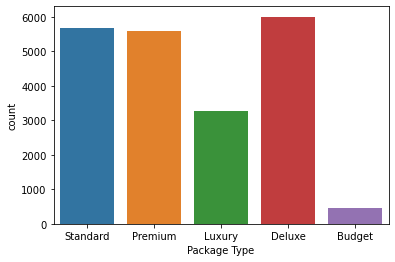

In [10]:
sns.countplot(x=df['Package Type'], data=df)

<AxesSubplot:xlabel='Start City', ylabel='count'>

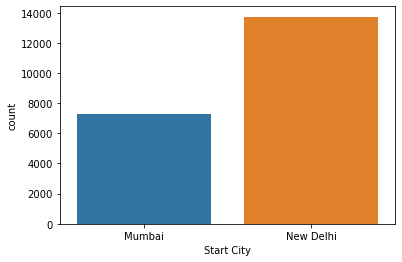

In [11]:
sns.countplot(x=df['Start City'])

<AxesSubplot:xlabel='Destination', ylabel='count'>

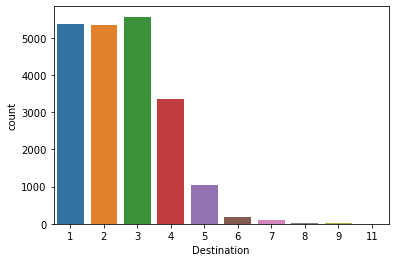

In [12]:
def split_str(x):
    return len(x.split("|"))
sns.countplot(x=df['Destination'].apply(split_str))

<AxesSubplot:ylabel='count'>

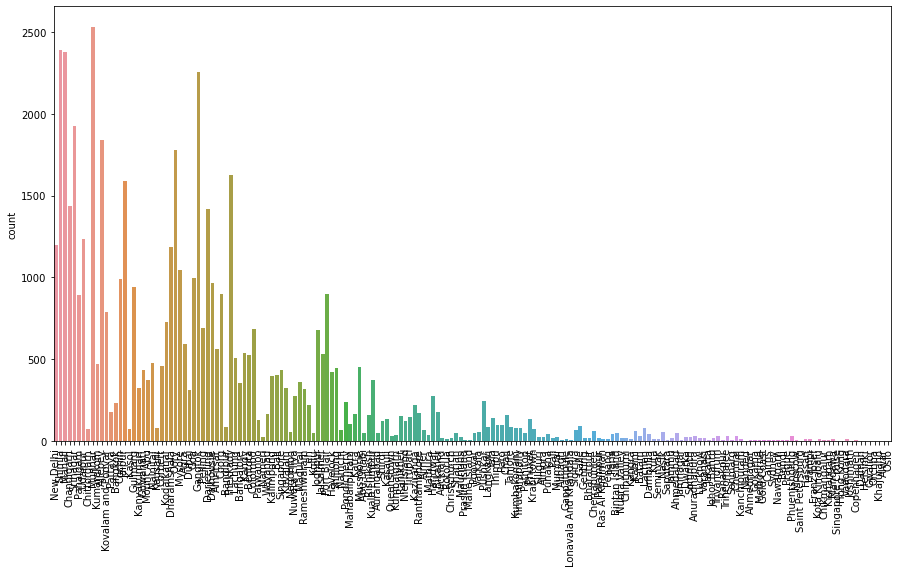

In [13]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
destinations = []
for i in df.Destination:
    destinations.extend(i.split("|"))
sns.countplot(x=pd.Series(destinations))

<AxesSubplot:xlabel='Airline', ylabel='count'>

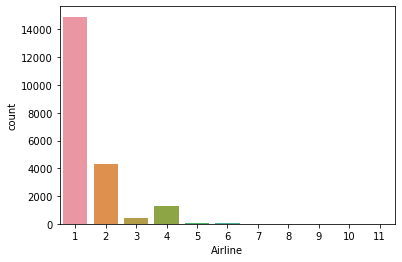

In [14]:

sns.countplot(x=df['Airline'].apply(split_str))

<AxesSubplot:ylabel='count'>

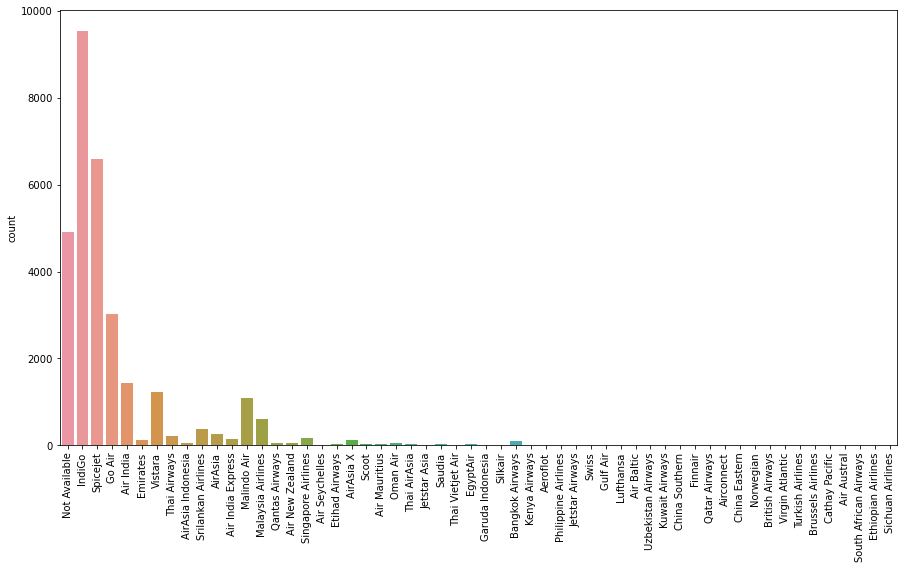

In [15]:
plt.figure(figsize=(15,8))
plt.xticks(rotation=90)
airlines = []
for i in df.Airline:
    airlines.extend(i.split("|"))
sns.countplot(x=pd.Series(airlines))

<AxesSubplot:xlabel='Meals', ylabel='count'>

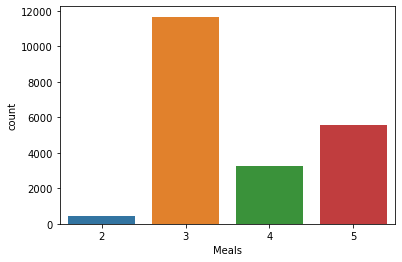

In [16]:
sns.countplot(x="Meals", data=df)

<AxesSubplot:xlabel='Sightseeing Places Covered', ylabel='count'>

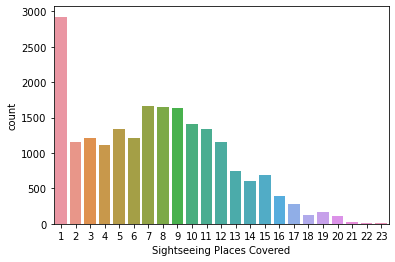

In [17]:
sns.countplot(x=df["Sightseeing Places Covered"].apply(split_str))

In [18]:
sights = []
for i in df["Sightseeing Places Covered"]:
    sights.extend(i.split("|"))
pd.Series(sights).value_counts(sort=True, ascending=False)    

 Mall road                                                                                                                                                                                       3648
 Eravikulam national park                                                                                                                                                                        2141
 Kufri                                                                                                                                                                                           1980
 Tata Tea Museum                                                                                                                                                                                 1938
 Dal Lake                                                                                                                                                                                        1861
          

<AxesSubplot:xlabel='Flight Stops', ylabel='count'>

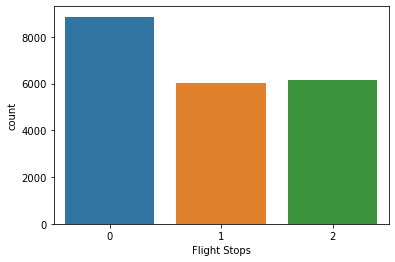

In [19]:
sns.countplot(x=df['Flight Stops'])

<AxesSubplot:xlabel='Per Person Price', ylabel='Flight Stops'>

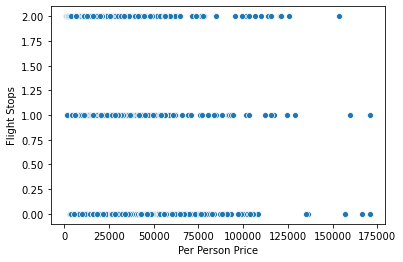

In [20]:
sns.scatterplot(y=df['Flight Stops'], x=df['Per Person Price'])

<AxesSubplot:xlabel='Places Covered', ylabel='count'>

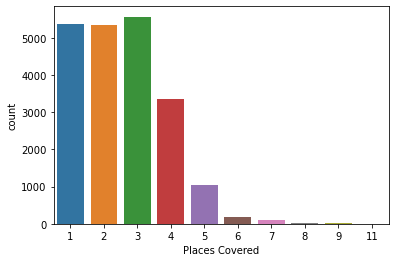

In [21]:
sns.countplot(x=df["Places Covered"].apply(split_str))

<AxesSubplot:xlabel='Itinerary', ylabel='count'>

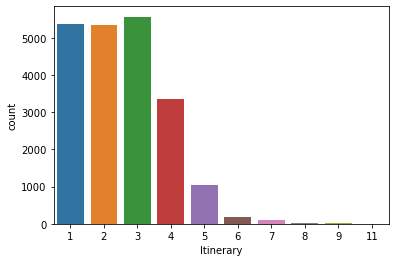

In [22]:
def split_dot(x):
    return len(x.split(' . '))
sns.countplot(x=df['Itinerary'].apply(split_dot))

<AxesSubplot:ylabel='count'>

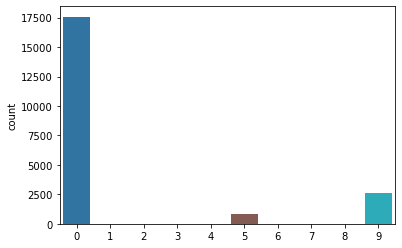

In [23]:
sns.countplot(x=pd.Categorical(df['Cancellation Rules']).codes)

In [24]:
pd.Series(pd.Categorical(df['Cancellation Rules']).codes).value_counts(
    sort=True,
    ascending=False
)

0    17574
9     2616
5      795
4        7
6        2
2        2
8        1
7        1
3        1
1        1
dtype: int64

In [25]:
df['destination_count'] = df['Destination'].apply(split_str)
df['airlines_ccount'] = df['Airline'].apply(split_str)
df['sightseeing_count'] = df["Sightseeing Places Covered"].apply(split_str)
df['hotel_details_count'] = df["Hotel Details"].apply(split_str)
df['place_covered_count'] = df["Places Covered"].apply(split_str)
df['itinerary_count'] = df['Itinerary'].apply(split_dot)


In [26]:
df.to_csv("cleaned_data.csv", index=False)